# Setup

In [ ]:
!pip install biopython
!pip install pandas

In [ ]:
import time
import os
from functools import wraps
from typing import Callable, Any

import re
import math
import itertools
from collections import defaultdict

import numpy as np
import pandas as pd

from Bio import SeqIO, motifs
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

In [2]:
def test_solution(func: Callable, input: str, expected: Any, *args) -> None:
  test_file = 'tmp.txt'
  with open(test_file, 'w') as f:
    f.write(input)
  actual = func(test_file, *args)
  if actual == expected:
    print("Test passed!")
  else:
    print(f"Test failed: \nExpected output: \n{repr(expected)}\nActual output: \n{repr(actual)}")

def timeit(n=1):
    def decorator(func):
        def wrapper(*args, **kwargs):
            total = 0
            for _ in range(n):
                start = time.perf_counter()
                func(*args, **kwargs)
                end = time.perf_counter()
                total += (end - start)
            avg_time = round(total/n, 6)
            print(f"Average execution time of *{args[0].__name__}* over {n} calls: {avg_time} seconds") if avg_time else None
            return func(*args, **kwargs)
        return wrapper
    return decorator

@timeit(n=1000)
def test_performance(func: Callable, filename: str) -> None:
  func(filename)

# Bioinformatics Stronghold

## Counting DNA Nucleotides

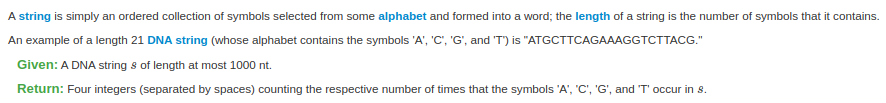

In [4]:
def count_dna_nucleotides(filename: str) -> tuple[int]:
  with open(filename) as f:
    s = f.read()
  return (s.count('A'), s.count('C'), s.count('G'), s.count('T'))

test_input = "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC"
test_output = (20, 12, 17, 21)
test_solution(count_dna_nucleotides, test_input, test_output)

Test passed!


## Transcribing DNA into RNA

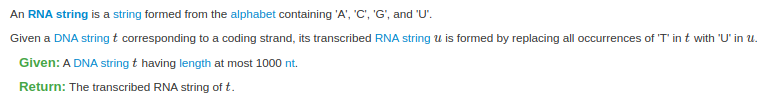

In [5]:
def transcribe_dna_into_rna(filename: str) -> str:
  with open(filename) as f:
    s = f.read()
  return s.replace('T', 'U')

# def transcribe_dna_into_rna(s: str) -> str:
#   table = str.maketrans({'T': 'U'})
#   return s.translate(table)

test_input = "GATGGAACTTGACTACGTAAATT"
test_output = "GAUGGAACUUGACUACGUAAAUU"
test_solution(transcribe_dna_into_rna, test_input, test_output)

Test passed!


## Complementing a Strand of DNA

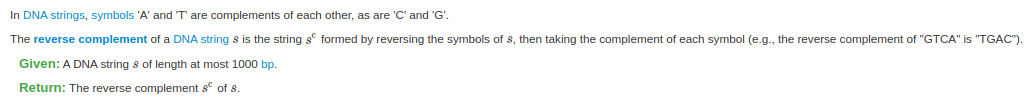

In [6]:
# def complement_dna_strand(filename: str) -> str:
#   with open(filename) as f:
#     s = f.read()
#   complements = {'A': 'T', 'G': 'C', 'C': 'G', 'T': 'A'}
#   return ''.join(complements[i] for i in reversed(s) if i in complements)

# def complement_dna_strand(filename: str) -> str:
#   with open(filename) as f:
#     s = f.read()
#   return s.replace('A', 't').replace('T', 'a').replace('C', 'g').replace('G', 'c').upper()[::-1]

def complement_dna_strand(filename: str) -> str:
  with open(filename) as f:
    s = f.read()
  return s[::-1].translate(str.maketrans('ACGT', 'TGCA'))

test_input = "AAAACCCGGT"
test_output = "ACCGGGTTTT"
test_solution(complement_dna_strand, test_input, test_output)

Test passed!


## Counting GC Content

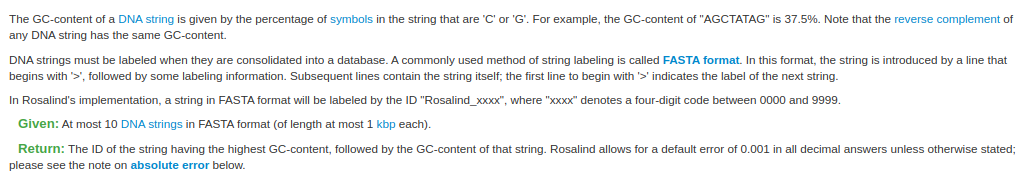

In [7]:
def count_gc_content(filename: str) -> tuple[str]:
  with open(filename) as f:
    gc = {}
    current = None
    # get records
    for line in f.readlines():
      if line.startswith('>'):
        current = line[1:].rstrip()
        gc[current] = ''
      else:
        gc[current] += line.rstrip()
    # count percents
    for k,v in gc.items():
      gc[k] = (v.count('C')+v.count('G'))/len(v)*100
    id = max(gc, key=gc.get)
    return (id, f'{gc[id]:.6f}')

# def count_gc_content(filename: str) -> tuple[str]:
#   with open(filename) as f:
#     s = f.read()
#   genes = s.split(">")[1:]
#   gc = []
#   for gene in genes:
#     a = gene.count("C") + gene.count("G")
#     b = gene.count("C") + gene.count("G") + gene.count("A") + gene.count("T")
#     gc.append(float(a)*100/b)
#   return (genes[gc.index(max(gc))][:13], f'{max(gc):.6f}')

# def count_gc_content(filename: str) -> tuple:
#   gc = {}
#   for record in SeqIO.parse(filename, 'fasta'):
#     gc[record.id] = gc_fraction(record.seq)
#   id = max(gc, key=gc.get)
#   return (id, f'{gc[id]*100:.6f}')



test_input = """>Rosalind_6404
CCTGCGGAAGATCGGCACTAGAATAGCCAGAACCGTTTCTCTGAGGCTTCCGGCCTTCCC
TCCCACTAATAATTCTGAGG
>Rosalind_5959
CCATCGGTAGCGCATCCTTAGTCCAATTAAGTCCCTATCCAGGCGCTCCGCCGAAGGTCT
ATATCCATTTGTCAGCAGACACGC
>Rosalind_0808
CCACCCTCGTGGTATGGCTAGGCATTCAGGAACCGGAGAACGCTTCAGACCAGCCCGGAC
TGGGAACCTGCGGGCAGTAGGTGGAAT
"""
test_output = ('Rosalind_0808', '60.919540')

test_solution(count_gc_content, test_input, test_output)

Test passed!


## Rabbits and Recurrence Relations

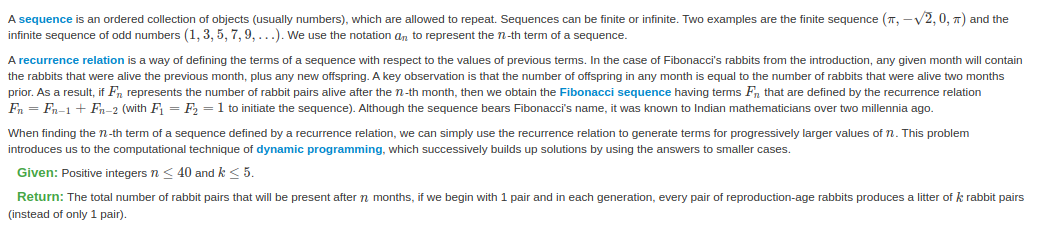

In [8]:
def fib(n: int, k: int = 1) -> int:
  a = 1
  b = 1
  print(f'Month 1: {a} pair')
  print(f'Month 2: {b} pair')
  for i in range(3, n+1):
    a, b = b, a*k+b
    print(f'Month {i}: {b} pairs')
  return b


def find_fib_number(filename: str) -> int:
  with open(filename) as f:
    n, k = f.readline().strip().split(' ')
    n, k = int(n), int(k)
  if n > 40 or k > 5:
    raise Exception("Incorrect input. The input constraints are: n should be ≤ 40, k should be ≤ 5.")
  return fib(n, k)

test_solution(find_fib_number, '5 3', 19)

Month 1: 1 pair
Month 2: 1 pair
Month 3: 4 pairs
Month 4: 7 pairs
Month 5: 19 pairs
Test passed!


## Mortal Fibonacci Rabits

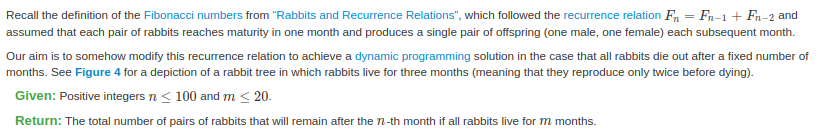

In [86]:
def mortal_fib(n: int, m: int) -> int:
  seq = [(1, 0), (0, 1)]    # (newborn, mature)
  for i in range(2, n):
    newborn = seq[i-1][1]
    dead = seq[i-m][0] if len(seq) >= m else 0
    mature = sum(seq[i-1]) - dead
    seq.append((newborn, mature))
    print(f'Month {i+1}: {sum(seq[i])} pairs')
  return sum(seq[-1])

def find_mortal_fib_number(filename: str) -> int:
  with open(filename) as f:
    n, m = f.readline().strip().split(' ')
    n, m = int(n), int(m)
  return mortal_fib(n, m)

test_solution(find_mortal_fib_number, '6 3', 4)

Month 3: 2 pairs
Month 4: 2 pairs
Month 5: 3 pairs
Month 6: 4 pairs
Test passed!


## Counting Point Mutations

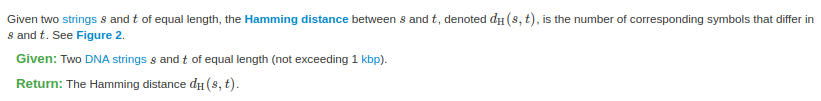

In [9]:
def count_point_mutations(filename: str) -> int:
  with open(filename) as f:
    s1 = f.readline().strip()
    s2 = f.readline().strip()
    assert len(s1) == len(s2)
  return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

# def count_point_mutations(filename: str) -> int:
#   with open(filename) as f:
#     s1 = f.readline().strip()
#     s2 = f.readline().strip()
#     assert len(s1) == len(s2)
#   count = 0
#   for i in range(len(s1)):
#     if s1[i] != s2[i]:
#       count += 1
#   return count

test_input = """GAGCCTACTAACGGGAT
CATCGTAATGACGGCCT
"""
test_output = 7

test_solution(count_point_mutations, test_input, test_output)

Test passed!


## Mendel's First Law

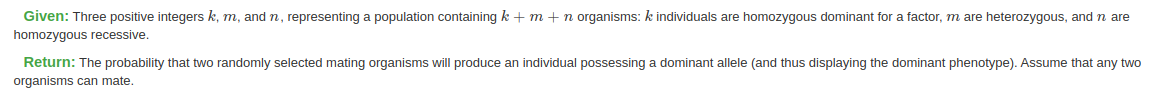

In [10]:
# def dominant_allele_probability(filename: str) -> float:
#   # TODO
#   with open(filename) as f:
#     AA, Aa, aa = (int(i) for i in f.read().strip().split())
#   total = AA+Aa+aa
#   d = total*(total-1)

#   p_2HomoRecessive = aa*(aa-1)/d
#   p_2Hetero = Aa*(Aa-1)/d
#   p_1HomoRecessive_1Hetero = aa*Aa/d

#   p_homo_recessive_offspring = p_2HomoRecessive*1 + p_2Hetero*0.25 + p_1HomoRecessive_1Hetero*0.5
#   p = 1 - p_homo_recessive_offspring
#   return round(p, 5)

def dominant_allele_probability(filename: str) -> float:
  with open(filename) as f:
    AA, Aa, aa = (int(i) for i in f.read().strip().split())
  total = AA+Aa+aa
  total_pairs = total*(total-1)/2

  # favorable pairs
  AA_AA = math.comb(AA, 2) if AA >= 2 else 0
  AA_Aa = AA*Aa
  AA_aa = AA*aa
  Aa_Aa = (math.comb(Aa, 2) if Aa >= 2 else 0)*0.75
  Aa_aa = Aa*aa*0.5
  favorable_pairs = AA_AA + AA_Aa + AA_aa + Aa_Aa + Aa_aa

  return round(favorable_pairs/total_pairs, 5)

test_input = '2 2 2'
test_output = 0.78333
test_solution(dominant_allele_probability, test_input, test_output)

Test passed!


## Translating RNA into Protein

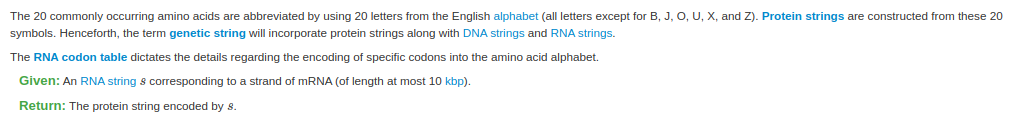

In [11]:
codon_table = CodonTable.standard_rna_table.forward_table
print(codon_table)

{'UUU': 'F', 'UUC': 'F', 'UUA': 'L', 'UUG': 'L', 'UCU': 'S', 'UCC': 'S', 'UCA': 'S', 'UCG': 'S', 'UAU': 'Y', 'UAC': 'Y', 'UGU': 'C', 'UGC': 'C', 'UGG': 'W', 'CUU': 'L', 'CUC': 'L', 'CUA': 'L', 'CUG': 'L', 'CCU': 'P', 'CCC': 'P', 'CCA': 'P', 'CCG': 'P', 'CAU': 'H', 'CAC': 'H', 'CAA': 'Q', 'CAG': 'Q', 'CGU': 'R', 'CGC': 'R', 'CGA': 'R', 'CGG': 'R', 'AUU': 'I', 'AUC': 'I', 'AUA': 'I', 'AUG': 'M', 'ACU': 'T', 'ACC': 'T', 'ACA': 'T', 'ACG': 'T', 'AAU': 'N', 'AAC': 'N', 'AAA': 'K', 'AAG': 'K', 'AGU': 'S', 'AGC': 'S', 'AGA': 'R', 'AGG': 'R', 'GUU': 'V', 'GUC': 'V', 'GUA': 'V', 'GUG': 'V', 'GCU': 'A', 'GCC': 'A', 'GCA': 'A', 'GCG': 'A', 'GAU': 'D', 'GAC': 'D', 'GAA': 'E', 'GAG': 'E', 'GGU': 'G', 'GGC': 'G', 'GGA': 'G', 'GGG': 'G'}


In [12]:
# def translate_rna(filename: str) -> str:
#   with open(filename) as f:
#     s = f.read().strip()
#   start = s.find('AUG')
#   protein_seq = []
#   for i in range(start, len(s), 3):
#     codon = s[i:i+3]
#     if codon in ['UAA', 'UAG', 'UGA']:
#       break
#     protein_seq.append(codon_table[codon])
#   return ''.join(protein_seq)

def translate_rna(filename: str) -> str:
  with open(filename) as f:
    s = f.read().strip()
  rna_seq = Seq(s)
  protein_seq = rna_seq.translate(to_stop=True)
  return protein_seq

test_input = "AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA"
test_output = "MAMAPRTEINSTRING"
test_solution(translate_rna, test_input, test_output)

Test passed!


## Finding a Motif in DNA

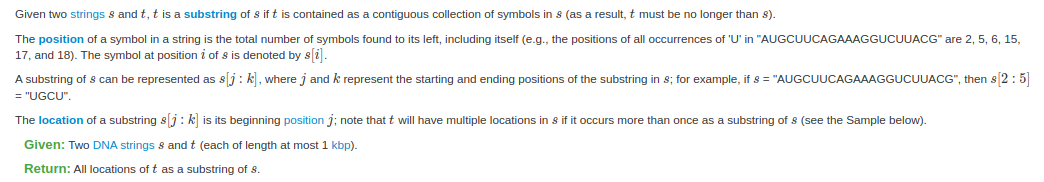

In [13]:
def naiveSearch(txt: str, pat: str) -> list[int]:
  # O(n*m)
  matches = []
  for i in range(len(txt)-len(pat)+1):
    j = 0
    while j < len(pat) and txt[i+j] == pat[j]:
      j += 1
    if j == len(pat):
      matches.append(i)
  return matches

def find_dna_motif(filename: str) -> list[int]:
  with open(filename) as f:
    s = f.readline().rstrip()
    m = f.readline().rstrip()
  matches = []
  i = s.find(m)
  while i != -1:
    matches.append(i+1)
    i = s.find(m, i+1)
  return matches

def find_dna_motif_re(filename: str) -> list[int]:
  with open(filename) as f:
    s = f.readline().rstrip()
    m = f.readline().rstrip()
  return [i.start()+1 for i in re.finditer(f"(?={m})", s)]

# def find_dna_motif_naive_1(filename: str) -> list[int]:
#   with open(filename) as f:
#     s = f.readline().rstrip()
#     m = f.readline().rstrip()
#   return [i+1 for i in naiveSearch(s, m)]

# def find_dna_motif_naive_2(filename: str) -> list[int]:
#   with open(filename) as f:
#     s = f.readline().rstrip()
#     m = f.readline().rstrip()
#   matches = []
#   for i in range(len(s)):
#     if s[i:].startswith(m):
#       matches.append(i+1)
#   return matches

test_input = """GATATATGCATATACTT
ATAT"""
test_output = [2, 4, 10]
test_solution(find_dna_motif, test_input, test_output)
test_solution(find_dna_motif_re, test_input, test_output)

Test passed!
Test passed!


Average execution time of *find_dna_motif* over 1000 calls: 2.8e-05 seconds  
Average execution time of *find_dna_motif_re* over 1000 calls: 4.5e-05 seconds  
Average execution time of *find_dna_motif_naive_1* over 1000 calls: 0.000359 seconds  
Average execution time of *find_dna_motif_naive_2* over 1000 calls: 0.0002 seconds

## Consensus and Profile

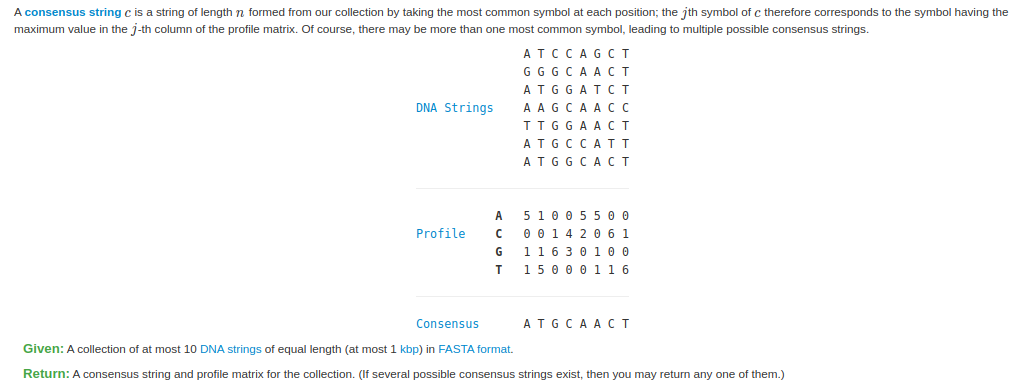

In [14]:
def consensus_and_profile(filename: str) -> str:
  records = SeqIO.parse(filename, 'fasta')

  # create profile
  profile = None
  for record in records:
    sequence = record.seq
    if not profile:
       sequence_length = len(sequence)
       profile = defaultdict(lambda: np.zeros(sequence_length, dtype=int))
    if len(sequence) != sequence_length:
       raise Exception('All sequences should have the same length')
    for i in range(len(sequence)):
       profile[sequence[i]][i] += 1
  profile = pd.DataFrame.from_dict(profile)

   # create consensus string
  consensus = ''.join([b for b in profile.idxmax(axis=1)])

  return f"""{consensus}
A: {' '.join(profile['A'].astype(str))}
C: {' '.join(profile['C'].astype(str))}
G: {' '.join(profile['G'].astype(str))}
T: {' '.join(profile['T'].astype(str))}"""

# def consensus_and_profile_1(filename: str) -> str:
#   records = SeqIO.parse(filename, 'fasta')

#   # create profile
#   profile = None
#   for record in records:
#     sequence = record.seq
#     if not isinstance(profile, pd.DataFrame):
#        sequence_length = len(sequence)
#        profile = pd.DataFrame(0, index=np.arange(sequence_length), columns=list('ACGT'))
#     if len(sequence) != sequence_length:
#        raise Exception('All sequences should have the same length')
#     for i in range(len(sequence)):
#        profile.loc[i, sequence[i]] += 1
#   # profile = pd.DataFrame.from_dict(profile)

#    # create consensus string
#   consensus = ''.join([b for b in profile.idxmax(axis=1)])

#   return f"""{consensus}
# A: {' '.join(profile['A'].astype(str))}
# C: {' '.join(profile['C'].astype(str))}
# G: {' '.join(profile['G'].astype(str))}
# T: {' '.join(profile['T'].astype(str))}"""

test_input = """>Rosalind_1
ATCCAGCT
>Rosalind_2
GGGCAACT
>Rosalind_3
ATGGATCT
>Rosalind_4
AAGCAACC
>Rosalind_5
TTGGAACT
>Rosalind_6
ATGCCATT
>Rosalind_7
ATGGCACT"""
test_output = """ATGCAACT
A: 5 1 0 0 5 5 0 0
C: 0 0 1 4 2 0 6 1
G: 1 1 6 3 0 1 0 0
T: 1 5 0 0 0 1 1 6"""

test_solution(consensus_and_profile, test_input, test_output)

Test passed!


Average execution time of *consensus_and_profile* over 10 calls: 0.02947 seconds  

Average execution time of *consensus_and_profile_1* over 10 calls: 1.372286 seconds

## Calculating Expected Offspring

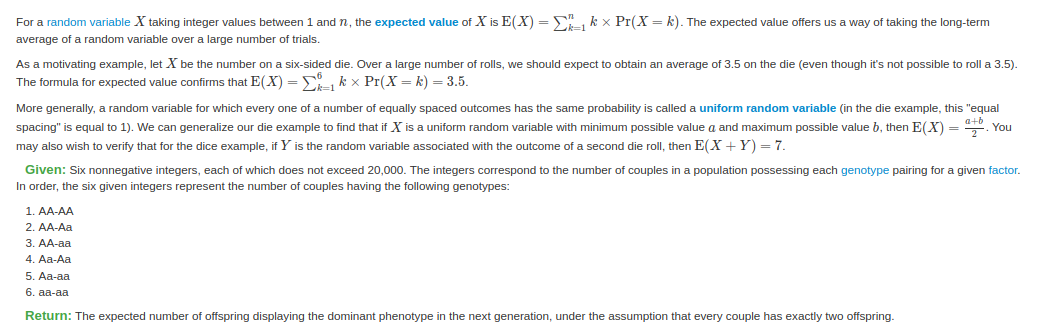

In [5]:
def expected_dominant_offsprings(filename: str) -> float:
    num_offsprings = 2
    with open(filename) as f:
        n_pairs = [int(i) for i in f.readline().split()]
    # pairs = ['AA-AA', 'AA-Aa', 'AA-aa', 'Aa-Aa', 'Aa-aa', 'aa-aa']
    probabilities = [1, 1, 1, 0.75, 0.5, 0]
    expected_dominant = 0
    for n, prob in zip(n_pairs, probabilities):
        expected_dominant += n*prob*num_offsprings
    return expected_dominant

test_solution(expected_dominant_offsprings, '1 0 0 1 0 1', 3.5)

Test passed!


## Inferring mRNA from Protein

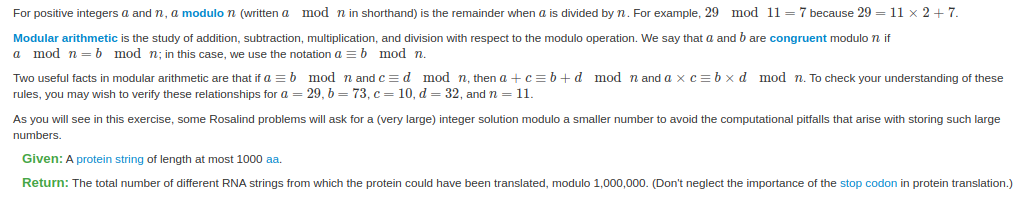

In [26]:
protein_to_mRNA_codons = {
    "A": ["GCU", "GCC", "GCA", "GCG"],
    "C": ["UGU", "UGC"],
    "D": ["GAU", "GAC"],
    "E": ["GAA", "GAG"],
    "F": ["UUU", "UUC"],
    "G": ["GGU", "GGC", "GGA", "GGG"],
    "H": ["CAU", "CAC"],
    "I": ["AUU", "AUC", "AUA"],
    "K": ["AAA", "AAG"],
    "L": ["UUA", "UUG", "CUU", "CUC", "CUA", "CUG"],
    "M": ["AUG"],
    "N": ["AAU", "AAC"],
    "P": ["CCU", "CCC", "CCA", "CCG"],
    "Q": ["CAA", "CAG"],
    "R": ["CGU", "CGC", "CGA", "CGG", "AGA", "AGG"],
    "S": ["UCU", "UCC", "UCA", "UCG", "AGU", "AGC"],
    "T": ["ACU", "ACC", "ACA", "ACG"],
    "V": ["GUU", "GUC", "GUA", "GUG"],
    "W": ["UGG"],
    "Y": ["UAU", "UAC"],
    "*": ["UAA", "UAG", "UGA"],
}

In [ ]:
def protein_to_mRNA_num(filename: str) -> int:
    with open(filename) as f:
        protein = f.readline().strip()
    n = 1
    for aa in protein:
        n *= len(protein_to_mRNA_codons[aa])
    n *= 3 # stop codons
    return n % 1000000

test_solution(protein_to_mRNA_num, 'MA', 12)

Test passed!


## Independent Alleles

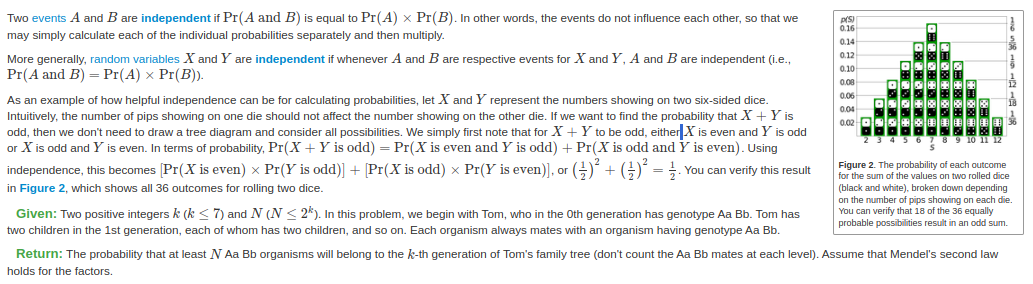

In [27]:
def prob_n_AaBb(filename: str) -> float:
    # AaBb + AaBb, 2 offsprings
    with open(filename) as f:
        generations, at_least = [int(i) for i in f.readline().split()]
    prob_AaBb = 0.25
    total_offsprings = 2**generations
    probs = []
    for k in range(at_least, total_offsprings+1):
        # probability of exactly k AaBb offsprings
        nCk = math.comb(total_offsprings, k)
        prob_k = nCk * (prob_AaBb**k) * ((1-prob_AaBb)**(total_offsprings-k))
        probs.append(prob_k)
    return round(sum(probs), 3)
    

test_solution(prob_n_AaBb, '2 1', 0.684)

Test passed!


## Calculating Protein Mass